In [38]:
import os
import re
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import pandas as pd

In [39]:
# Figure1: 01-Pre-process for MODE
data1_dir = '/Users/crystal_zhao/Desktop/1-3-4-6-7/MODE/'
data2_dir = '/Users/crystal_zhao/Desktop/3-4-7-8/MODE/'
results_MODE1 = {
    'MODE': {
        'best_fitness': {},
        'mean_fitness': {},
        'std_fitness': {},
    }
}
results_MODE2 = {
    'MODE': {
        'best_fitness': {},
        'mean_fitness': {},
        'std_fitness': {},
    }
}


pattern = re.compile(r"MODE Generation (\d+): Best Fitness = ([\d\.-]+), Mean Fitness = ([\d\.-]+), Std Fitness = ([\d\.-]+)")

for i in range(1, 11):
    results_MODE1['MODE']['best_fitness'][i] = []
    results_MODE1['MODE']['mean_fitness'][i] = []
    results_MODE1['MODE']['std_fitness'][i] = []
    results_MODE2['MODE']['best_fitness'][i] = []
    results_MODE2['MODE']['mean_fitness'][i] = []
    results_MODE2['MODE']['std_fitness'][i] = []
    
    file_path1 = os.path.join(data1_dir, f'run{i}', 'result.txt')
    file_path2 = os.path.join(data2_dir, f'run{i}', 'result.txt')

    try:
        with open(file_path1, 'r', encoding='utf-8') as file:
            data1_content = file.read()
    except FileNotFoundError:
        print(f"Run {i} - MODE1: File not found: {file_path1}")
        data1_content = None
    except Exception as e:
        print(f"Run {i} - MODE1: Error reading {file_path1}: {e}")
        data1_content = None

    try:
        with open(file_path2, 'r', encoding='utf-8') as file:
            data2_content = file.read()
    except FileNotFoundError:
        print(f"Run {i} - MODE2: File not found: {file_path2}")
        data2_content = None
    except Exception as e:
        print(f"Run {i} - MODE2: Error reading {file_path2}: {e}")
        data2_content = None

    if data1_content:
        matches1 = list(pattern.finditer(data1_content))
        for match in matches1:
            try:
                best_fitness = float(match.group(2))
                mean_fitness = float(match.group(3))
                std_fitness = float(match.group(4))
                results_MODE1['MODE']['best_fitness'][i].append(best_fitness)
                results_MODE1['MODE']['mean_fitness'][i].append(mean_fitness)
                results_MODE1['MODE']['std_fitness'][i].append(std_fitness)
            except ValueError as e:
                print(f"Run {i} - MODE1: ValueError: {e}")
    else:
        print(f"Run {i} - MODE1: No data to process.")

    if data2_content:
        matches2 = list(pattern.finditer(data2_content))
        for match in matches2:
            try:
                best_fitness = float(match.group(2))
                mean_fitness = float(match.group(3))
                std_fitness = float(match.group(4))
                results_MODE2['MODE']['best_fitness'][i].append(best_fitness)
                results_MODE2['MODE']['mean_fitness'][i].append(mean_fitness)
                results_MODE2['MODE']['std_fitness'][i].append(std_fitness)
            except ValueError as e:
                print(f"Run {i} - MODE2: ValueError: {e}")
    else:
        print(f"Run {i} - MODE2: No data to process.")

In [40]:
# Figure1: 02-Pre-process for NSGA-III
path1 = r'solution_figure/1_3_4_6_7/avg/300_0.8_0.2_0.5_7/NSGA'
file = open(path1+'/data_f.pkl', 'rb')
results_NSGA1 = pickle.load(file)
path2 = r'solution_figure/3_4_7_8/avg/300_0.8_0.2_0.5_7/NSGA'
file = open(path2+'/data_f.pkl', 'rb')
results_NSGA2 = pickle.load(file)

In [41]:
# Figure1: 03-combine NSGA and DEMO
enemy_list = ['1_3_4_6_7','3_4_7_8']
algo_list = ['NSGA','MODE']
E1 = [results_NSGA1,results_MODE1]
E2 = [results_NSGA2,results_MODE2]
E = [E1,E2]
F = [[]] * 2
for i in range(2):
    for k in range(2):
        algo = algo_list[k]
        data = E[i][k]
        f = [pd.DataFrame() for _ in range(10)] 
        for k in range(10):
            f[k]["generation"] = [i+1 for i in range(30)]
            f[k]["method"] = [algo] * 30
            f[k]["best_fitness"] = pd.DataFrame.from_dict(data[algo]['best_fitness'][k+1])  
            f[k]["mean_fitness"] = pd.DataFrame.from_dict(data[algo]['mean_fitness'][k+1]) 
            f[k]["std_fitness"] = pd.DataFrame.from_dict(data[algo]['std_fitness'][k+1]) 
        _f = pd.concat([D for D in f])
        if algo == "NSGA":
            F[i] = _f   
        else:
            F[i] = pd.concat([F[i], _f], axis=0) 
print(F)

[    generation method  best_fitness  mean_fitness  std_fitness
0            1   NSGA        -280.0   -468.572667    56.970951
1            2   NSGA        -218.0   -360.049333    48.370575
2            3   NSGA        -218.0   -314.526667    45.350807
3            4   NSGA        -149.0   -285.590000    45.008734
4            5   NSGA        -111.0   -270.468667    47.074239
..         ...    ...           ...           ...          ...
25          26   MODE        -100.0   -239.222000    48.248900
26          27   MODE        -100.0   -232.274000    44.341100
27          28   MODE        -150.0   -224.620000    44.170700
28          29   MODE        -150.0   -223.425000    44.124100
29          30   MODE        -145.4   -218.984000    38.251500

[600 rows x 5 columns],     generation method  best_fitness  mean_fitness  std_fitness
0            1   NSGA         -97.0   -353.899333    78.548904
1            2   NSGA         -65.4   -196.119333    59.354589
2            3   NSGA        

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

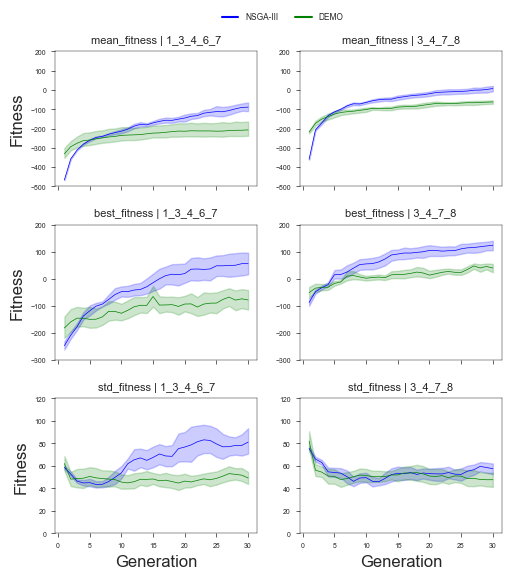

In [42]:
# Figure1: 04-plot
metrics = ['mean_fitness', 'best_fitness', 'std_fitness']
all_data = []

for e_idx, enemy in enumerate(enemy_list):
    df = F[e_idx].copy()
    df['enemy'] = enemy
    all_data.append(df)
combined_df = pd.concat(all_data, ignore_index=True)

df_melted = pd.melt(
    combined_df, 
    id_vars=['generation', 'method', 'enemy'], 
    value_vars=metrics, 
    var_name='metric', 
    value_name='fitness'
)

sns.set(style="ticks")

g = sns.FacetGrid(
    df_melted, 
    row='metric', 
    col='enemy', 
    sharex=True, 
    sharey=False,  
    height=2,        
    aspect=1  
)

g.map_dataframe(
    sns.lineplot, 
    x='generation', 
    y='fitness', 
    hue='method', 
    palette={'NSGA': 'blue', 'MODE': 'green'}, 
    linewidth=0.5
)

g.set_titles(row_template='{row_name}', col_template='{col_name}', size=8)
g.set_axis_labels("Generation", "Fitness")

metric_ylim = {
    'mean_fitness': (-500, 200),
    'best_fitness': (-300, 200),
    'std_fitness': (0, 120)
}

for ax in g.axes.flatten():
    title = ax.get_title()
    metric = title.split('|')[0].strip()
    enemy = title.split('|')[-1].strip()
    
    if metric in metric_ylim:
        ax.set_ylim(metric_ylim[metric])
    
    ax.tick_params(axis='x', labelsize=5, length=3, width=0.5)
    ax.tick_params(axis='y', labelsize=5, length=3, width=0.5)
    
    for spine in ['top', 'right', 'left', 'bottom']:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_edgecolor('black')
        ax.spines[spine].set_linewidth(0.3)

handles, labels = g.axes[0,0].get_legend_handles_labels()
new_labels = ['NSGA-III' if label == 'NSGA' else label for label in labels]
new_labels = ['DEMO' if label == 'MODE' else label for label in new_labels]
g.add_legend(
    title='', 
    fontsize=6, 
    title_fontsize=5, 
    loc='lower center', 
    ncol=7, 
    handles=handles,
    labels = new_labels,
    bbox_to_anchor=(0.55, 0.98) 
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig('T2_Figure1_final.png', bbox_inches='tight', dpi=300)
plt.show()

In [43]:
# Figure2: 01-Import data
path = '/Users/crystal_zhao/Desktop/EC/01_assignment/01_standard/_past_solution/evoman_framework/figure3.txt'

with open(path, 'rb') as file:
    data = pd.read_csv(file,sep='\t',header=None)
    data.columns = ["run", "gain", "enemy", "method"]
data = pd.DataFrame(data)
print(data)

     run   gain      enemy method
0      1  -88.0  1_3_4_6_7   NSGA
1      1   41.0  1_3_4_6_7   DEMO
2      2  -33.6  1_3_4_6_7   NSGA
3      2 -130.8  1_3_4_6_7   DEMO
4      3   63.2  1_3_4_6_7   NSGA
..   ...    ...        ...    ...
115    8 -175.8    3_4_7_8   DEMO
116    9  173.2    3_4_7_8   NSGA
117    9  -64.0    3_4_7_8   DEMO
118   10  -70.8    3_4_7_8   NSGA
119   10 -270.0    3_4_7_8   DEMO

[120 rows x 4 columns]


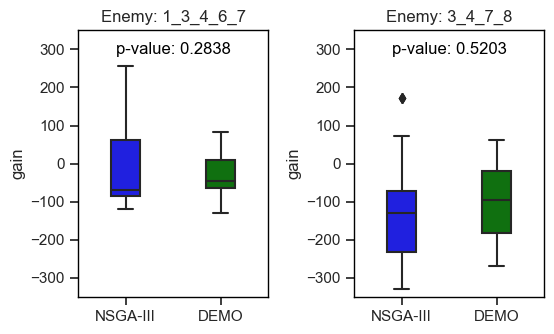

In [44]:
# Figure2: 02-Plot
sns.set(style="ticks")
num_enemies = len(enemy_list)
data['method'] = data['method'].replace('NSGA', 'NSGA-III')

fig, axes = plt.subplots(1, num_enemies, figsize=(3 * num_enemies, 3.5), sharey=True)
y_min, y_max = -350, 350

for idx, enemy in enumerate(enemy_list):
    ax = axes[idx] 
    df_enemy = data[data['enemy'] == enemy]
    methods_present = df_enemy['method'].unique()
    
    if not {'NSGA-III', 'DEMO'}.issubset(methods_present):
        print(f"Enemy: {enemy} No data")
        ax.set_visible(False)  
        continue
    
    sns.boxplot(
        x='method', 
        y='gain', 
        data=df_enemy, 
        ax=ax, 
        width=0.3, 
        palette={'NSGA-III': 'blue', 'DEMO': 'green'}
    )
    
    sns.despine(ax=ax)

    ax.set_title(f'Enemy: {enemy}')
    ax.set_xlabel('') 

    ax.set_ylim(y_min, y_max)

    scores_EA1 = df_enemy[df_enemy['method'] == 'NSGA-III']['gain']
    scores_EA2 = df_enemy[df_enemy['method'] == 'DEMO']['gain']

    # T-test
    if len(scores_EA1) > 1 and len(scores_EA2) > 1:
        t_stat, p_value = ttest_ind(scores_EA1, scores_EA2, nan_policy='omit')
    else:
        t_stat, p_value = None, None
        print(f"Run {enemy}: Data is not enough")
    
    if p_value is not None:
        ax.text(
            0.5, 0.9, f'p-value: {p_value:.4f}',
            ha='center', va='bottom', transform=ax.transAxes, color='black'
        )
    else:
        ax.text(
            0.5, 0.9, 'p-value: N/A',
            ha='center', va='bottom', transform=ax.transAxes, color='red'
        )
        
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_edgecolor('black')
        spine.set_linewidth(1)
    
    ax.tick_params(axis='y', which='both', labelleft=True, labelright=False)

plt.tight_layout(rect=[0.05, 0, 1, 1])  
plt.savefig('T2_Figure2_final.png', dpi=300)
plt.show()